In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

In [2]:
# loading traffic, detector location, and links dataset
data_subset = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_0.csv')

In [3]:
data_subset.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,2020-03-02,176,1742.0
1,1001020100,1001020200,-86.490076,32.477185,-86.473375,32.474248,2020-03-02,11,108.0
2,1001020100,1001020300,-86.490076,32.477185,-86.460190,32.475428,2020-03-02,13,128.0
3,1001020100,1001020400,-86.490076,32.477185,-86.443624,32.472001,2020-03-02,19,188.0
4,1001020100,1001020500,-86.490076,32.477185,-86.422661,32.458833,2020-03-02,46,455.0


In [4]:
california = gpd.read_file(r'.\DataScienceData\mobility\geo boundry\california\tl_2020_06_tract.shp')
california.head()

,geometry
0,"POLYGON ((-119.33828 35.58143, -119.33827 35.5..."
1,"POLYGON ((-120.59599 37.34121, -120.59596 37.3..."
2,"POLYGON ((-121.87381 37.34412, -121.87361 37.3..."
3,"POLYGON ((-120.61016 38.41560, -120.61000 38.4..."
4,"POLYGON ((-119.25262 35.79043, -119.25259 35.7..."


<AxesSubplot:>

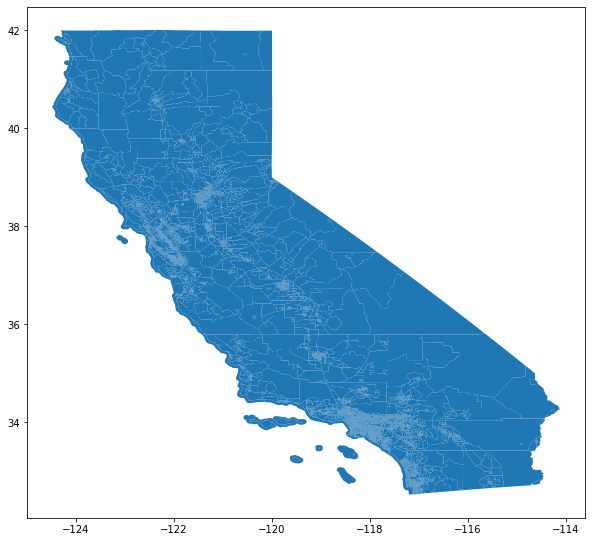

In [5]:
california.plot(figsize=(10, 10))

### We are interested in the shape file of the los angeles

In [6]:
la = gpd.read_file(r'.\DataScienceData\mobility\geo boundry\los_angeles\Census_Tracts_2020.shp')
la.head()

,OBJECTID,CT20,LABEL,ShapeSTAre,ShapeSTLen,geometry
0,1,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.28491 34.25948, -118.28494 34.2..."
1,2,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.29015 34.27417, -118.29015 34.2..."
2,3,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.28100 34.25592, -118.28101 34.2..."
3,4,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28735 34.2..."
4,5,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25405, -118.28594 34.2..."


<AxesSubplot:>

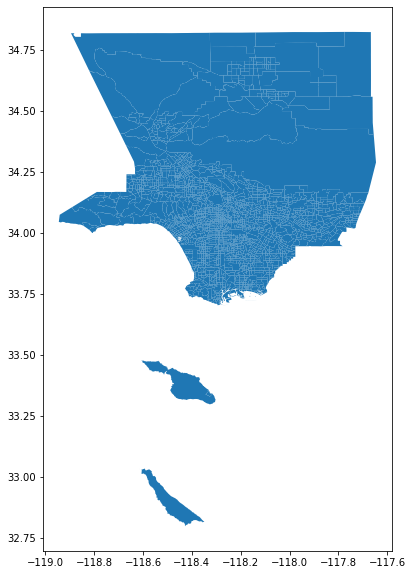

In [7]:
la.plot(figsize=(10, 10))

Perfect! So we have clear defined borders for the Los Angeles state. Also, we know that the StateFP for California is 06 and CountyFP for Los angeles is 037. So let's see the movement where Origin station was in Los angeles. 

In [8]:
data_subset.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
0,1001020100,1001020100,-86.490076,32.477185,-86.490076,32.477185,2020-03-02,176,1742.0
1,1001020100,1001020200,-86.490076,32.477185,-86.473375,32.474248,2020-03-02,11,108.0
2,1001020100,1001020300,-86.490076,32.477185,-86.460190,32.475428,2020-03-02,13,128.0
3,1001020100,1001020400,-86.490076,32.477185,-86.443624,32.472001,2020-03-02,19,188.0
4,1001020100,1001020500,-86.490076,32.477185,-86.422661,32.458833,2020-03-02,46,455.0


In [9]:
LA_origin_data = data_subset[(data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 

In [10]:
LA_origin_data.shape

(1158, 9)

So we have 1158 different data rows where origin point was in LA. Let's how may have destination at LA.

In [11]:
LA_destination_data = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000)] 

In [12]:
LA_destination_data.shape

(2209, 9)

Now let's see how many just travelled locally. 

In [13]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 

In [14]:
LA_local_movement.shape

(865, 9)

This data doesn't seems to be enough. Let's loop through all the files. 

In [15]:
for i in range(1,20):
    x = pd.read_csv(r'.\DataScienceData\mobility\12520739\unzipped\03_02\daily_ct2ct_03_02_' + str(i) + '.csv')
    data_subset = pd.concat([data_subset, x], axis=0)
    print(data_subset.shape)

(963598, 9)
(1445397, 9)
(1927196, 9)
(2408995, 9)
(2890794, 9)
(3372593, 9)
(3854392, 9)
(4336191, 9)
(4817990, 9)
(5299789, 9)
(5781588, 9)
(6263387, 9)
(6745186, 9)
(7226985, 9)
(7708784, 9)
(8190583, 9)
(8672382, 9)
(9154181, 9)
(9635987, 9)


Now let's see the internal movement

In [16]:
LA_local_movement = data_subset[(data_subset['geoid_d'] > 6036999999) & (data_subset['geoid_d'] < 6038000000) & (data_subset['geoid_o'] > 6036999999) & (data_subset['geoid_o'] < 6038000000)] 

In [17]:
LA_local_movement.shape

(280730, 9)

In [18]:
LA_local_movement.head()

,geoid_o,geoid_d,lng_o,lat_o,lng_d,lat_d,date,visitor_flows,pop_flows
52914,6037430902,6037401304,-118.014528,34.134866,-117.812290,34.084984,2020-03-02,1,22.0
52917,6037430902,6037404401,-118.014528,34.134866,-117.916183,34.129228,2020-03-02,2,45.0
52918,6037430902,6037431001,-118.014528,34.134866,-118.005135,34.148412,2020-03-02,13,297.0
52919,6037430902,6037431100,-118.014528,34.134866,-117.997192,34.136076,2020-03-02,16,366.0
52921,6037430902,6037143700,-118.014528,34.134866,-118.356774,34.129185,2020-03-02,1,22.0


Now that is some decent amount of data. Now let's plot top 5 locations on interactive map to verify.

In [19]:
import folium
LA_map = folium.Map(location=[33.976848,-118.216677], zoom_start=10)
folium.Marker([34.134866, -118.014528], popup= 1).add_to(LA_map)
LA_map

Perfet! Now let's see which census tracts have most visitors.

In [25]:
visitor_by_cesus_tract = LA_local_movement.groupby(['geoid_d']).sum()['visitor_flows']

In [26]:
visitor_by_cesus_tract

geoid_d
6037101110    355
6037101122    216
6037101210    433
6037101220    214
6037101300    464
             ... 
6037980031    487
6037980033    469
6037990100      2
6037990200      3
6037990300      1
Name: visitor_flows, Length: 2346, dtype: int64

Let's check which census tract is the most visited.

In [32]:
visitor_by_cesus_tract.idxmax()

6037980028

Plotting it on the graph using the lat long for the destination

In [37]:
LA_local_movement[LA_local_movement['geoid_d'] == 6037980028].iloc[0]

geoid_o          6037430400
geoid_d          6037980028
lng_o            -118.02587
lat_o             34.162516
lng_d           -118.413523
lat_d             33.939855
date             2020-03-02
visitor_flows             1
pop_flows              22.0
Name: 66424, dtype: object

In [38]:
folium.Marker([33.939855, -118.413523], popup= 6037980028).add_to(LA_map)
LA_map

We can see that the new marker is at Los Angeles internation airport. This makes sense. 

## Now we have to make some assumptions and develop the mathematics of the logic to optimize the solution

As LA is didvided into non overlapping square cells. Let's denote LA as $C$ = {$C_{1}$, $C_{2}$, ..., $C_{N}$}.